In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book (1).csv


In [28]:
df=pd.read_csv("book.csv",sep="," ,error_bad_lines=False ,encoding="latin1")
df.head()

<ipython-input-28-5a3b7947426a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("book.csv",sep="," ,error_bad_lines=False ,encoding="latin1")


,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [37]:
df = df.iloc[:, 1:]

In [38]:
df.shape

(10000, 3)

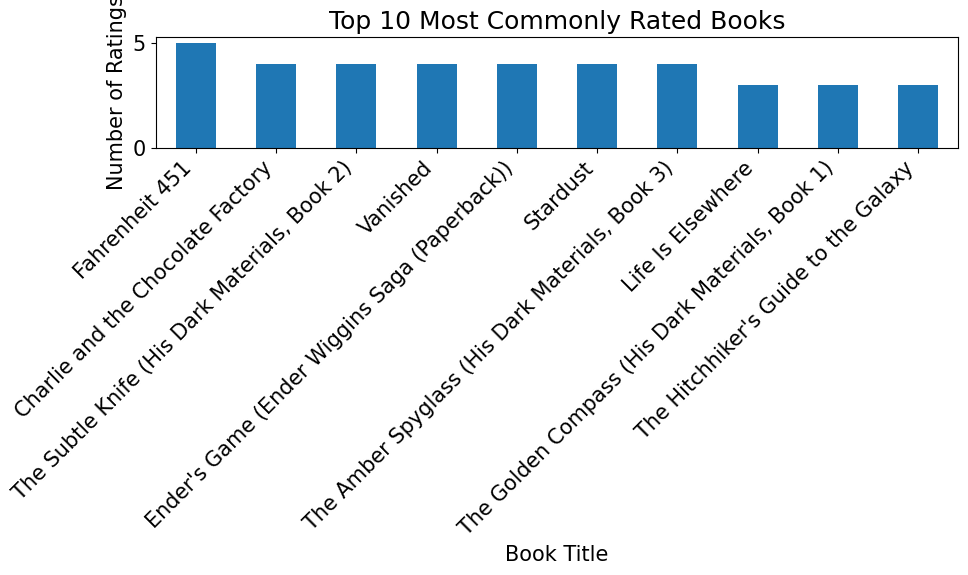

In [30]:
# Get the value counts of each book title
book_value_counts = df["Book.Title"].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
book_value_counts.head(10).plot(kind="bar")
plt.title("Top 10 Most Commonly Rated Books")
plt.xlabel("Book Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<ipython-input-31-4556caeb4953>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


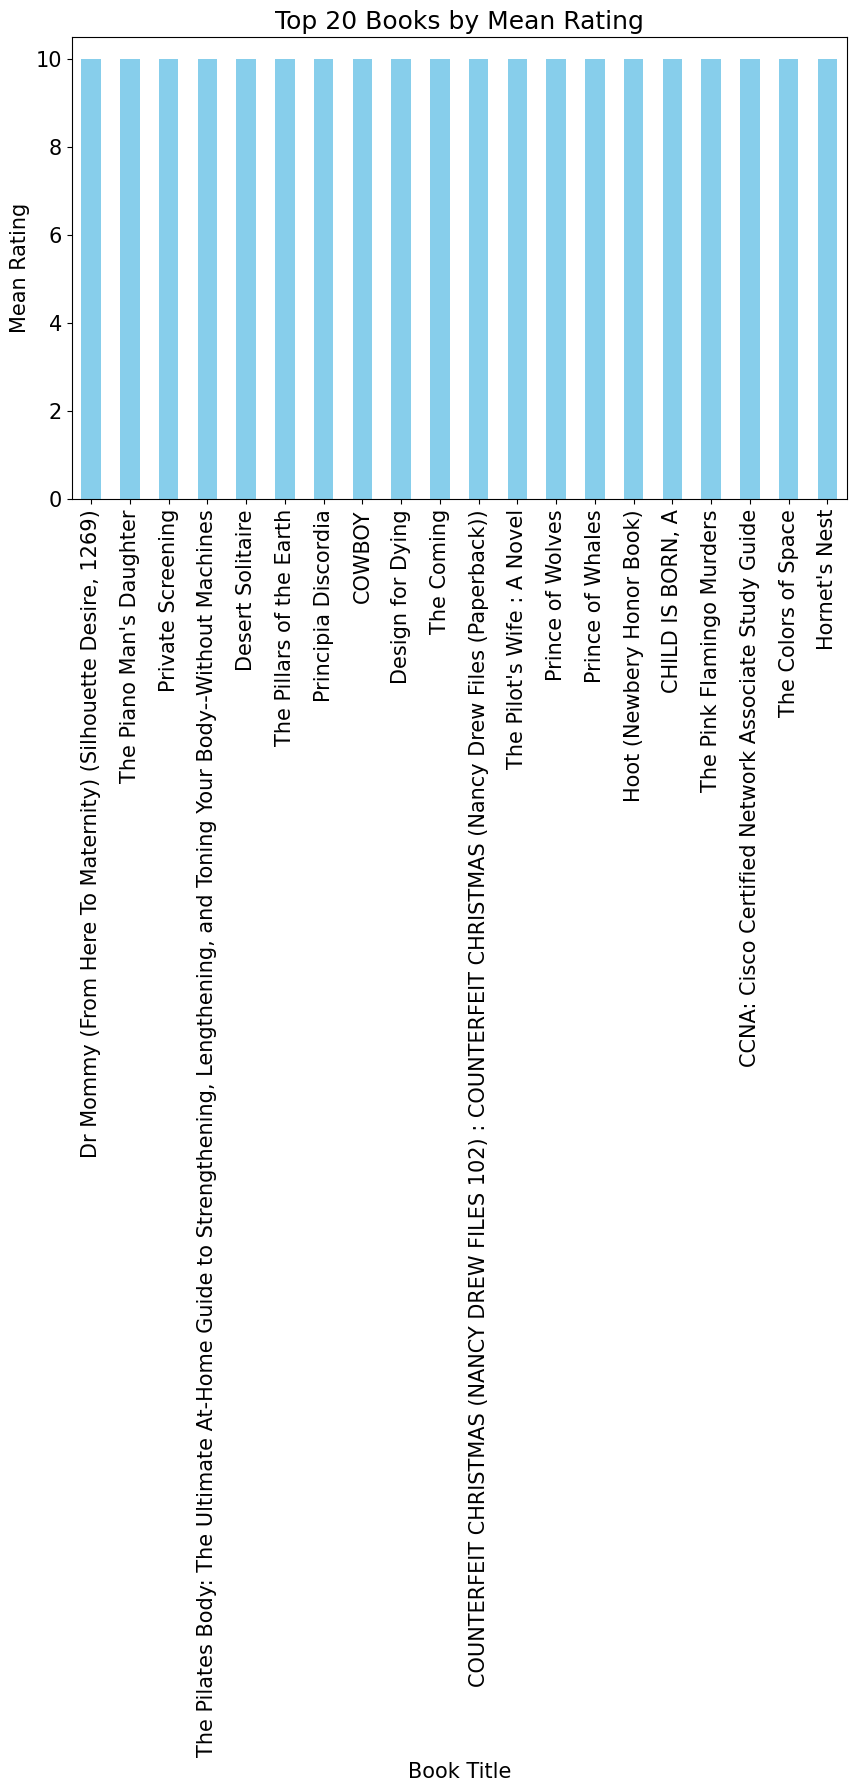

In [31]:
# Calculate the mean rating for each book
mean_ratings = df.groupby("Book.Title")["Book.Rating"].mean().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
mean_ratings.head(20).plot(kind="bar", color="skyblue")
plt.title("Top 20 Books by Mean Rating")
plt.xlabel("Book Title")
plt.ylabel("Mean Rating")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
mean_ratings

Book.Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
                                                                                                                      ... 
Buster Midnight's Cafe                                                                                                 1.0
Fatal Care                                                                                                             1.0
The S

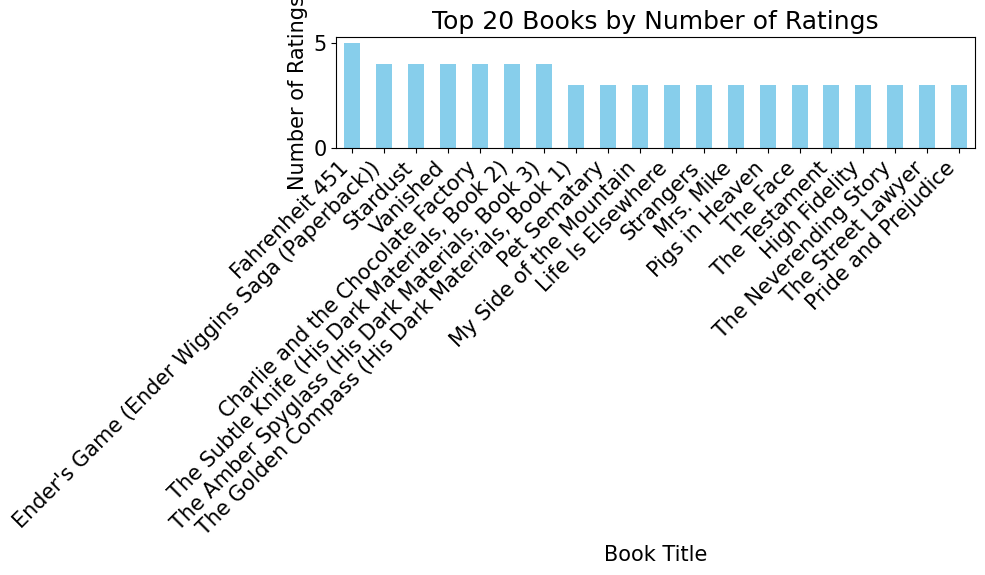

In [33]:
# Group the data by book title and count the number of ratings
book_ratings_count = df.groupby("Book.Title")["User.ID"].count().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
book_ratings_count.head(20).plot(kind="bar", color="skyblue")
plt.title("Top 20 Books by Number of Ratings")
plt.xlabel("Book Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [34]:
book_ratings_count

Book.Title
Fahrenheit 451                                                            5
Ender's Game (Ender Wiggins Saga (Paperback))                             4
Stardust                                                                  4
Vanished                                                                  4
Charlie and the Chocolate Factory                                         4
                                                                         ..
His and Hers: Ranchin' Dads (Harlequin - Western Lovers)                  1
His-And-Hers Twins (Harlequin American Romance, No. 820)                  1
Histoires Extraordinaires                                                 1
Historia de la vida del BuscÃ³n (Selecciones Austral ; 24 : ClÃ¡sicos)    1
Ã?Â?bermorgen.                                                            1
Name: User.ID, Length: 9659, dtype: int64

In [39]:
df.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [41]:
df.groupby("Book.Title")["Book.Rating"].count().sort_values(ascending=False).head(10)

Book.Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: Book.Rating, dtype: int64

In [87]:
# Filter out books with <1 ratings
popular_books = book_ratings_count[book_ratings_count >= 1]
popular_books.head(10)

Book.Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: User.ID, dtype: int64

In [88]:
popular_books.shape

(9659,)

In [89]:
# Merge the filtered_books Series with the original dataset
merged_df = df.merge(popular_books, left_on="Book.Title", right_index=True, suffixes=("", "_Count"))
merged_df.head(15)

,User.ID,Book.Title,Book.Rating,User.ID_Count
0,276726,Classical Mythology,5,1
1,276729,Clara Callan,3,1
2,276729,Decision in Normandy,6,1
3,276736,Flu: The Story of the Great Influenza Pandemic...,8,1
4,276737,The Mummies of Urumchi,6,1
5,276744,The Kitchen God's Wife,7,2
1429,278012,The Kitchen God's Wife,7,2
6,276745,What If?: The World's Foremost Military Histor...,10,1
7,276747,PLEADING GUILTY,9,1
8,276747,Under the Black Flag: The Romance and the Real...,9,1


In [90]:
merged_df.shape

(10000, 4)

In [91]:
filtered_books = mean_ratings[mean_ratings >= 5]
filtered_books.head(10)

Book.Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
The Pillars of the Earth                                                                                              10.0
Principia Discordia                                                                                                   10.0
COWBOY                                                                                                                10.0
Desig

In [92]:
filtered_books.shape

(9197,)

In [93]:
merged_final_df = merged_df.merge(filtered_books, left_on="Book.Title", right_index=True, suffixes=("", "_Mean"))
merged_final_df.head(15)

,User.ID,Book.Title,Book.Rating,User.ID_Count,Book.Rating_Mean
0,276726,Classical Mythology,5,1,5.0
2,276729,Decision in Normandy,6,1,6.0
3,276736,Flu: The Story of the Great Influenza Pandemic...,8,1,8.0
4,276737,The Mummies of Urumchi,6,1,6.0
5,276744,The Kitchen God's Wife,7,2,7.0
1429,278012,The Kitchen God's Wife,7,2,7.0
6,276745,What If?: The World's Foremost Military Histor...,10,1,10.0
7,276747,PLEADING GUILTY,9,1,9.0
8,276747,Under the Black Flag: The Romance and the Real...,9,1,9.0
9,276747,Where You'll Find Me: And Other Stories,8,1,8.0


In [94]:
merged_final_df.shape

(9532, 5)

In [95]:
merged_final_df = merged_final_df.drop(columns=["User.ID_Count","Book.Rating_Mean"])
merged_final_df.shape

(9532, 3)

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


In [97]:
# Create a pivot matrix (user-book rating matrix)
pivot_matrix = merged_final_df.pivot_table(index="User.ID", columns="Book.Title", values="Book.Rating").fillna(0)
pivot_matrix.head(10)

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,...,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(pivot_matrix)

In [99]:
# Calculate the cosine similarity between books
cosine_sim = cosine_similarity(normalized_matrix.T)

# Convert the cosine similarity matrix to a DataFrame for easier indexing
cosine_sim_df = pd.DataFrame(cosine_sim, index=pivot_matrix.columns, columns=pivot_matrix.columns)
cosine_sim_df.head()


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,...,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust
Book.Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Function to recommend books based on a given book title
def recommend_books(book_title, num_recommendations=5):
    similar_books = cosine_sim_df[book_title].sort_values(ascending=False)
    recommendations = similar_books.drop(book_title).head(num_recommendations)
    return recommendations

In [101]:
# Example: Recommend books similar to "A Time to Kill"
recommended_books = recommend_books("A Time to Kill")
print("Recommended books similar to 'A Time to Kill':")
print(recommended_books)

Recommended books similar to 'A Time to Kill':
Book.Title
House of Spirits                                                         0.83205
Mister Rogers Talks With Parents                                         0.83205
Le Mariage De Figaro: Comedie En Cinq Actes, 1784                        0.83205
Father Of Her Child  (Top Author) (Harlequin Presents, No 1833)          0.83205
Peace Corps - The Great Adventure: Volunteer Stories of Life Overseas    0.83205
Name: A Time to Kill, dtype: float64
